# Logistic Regression

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Let us consider the following data in `xps` and `xms`. These are features of two classes +1 and -1.

When we have two classes we usually call them +1 and -1 since it simplify a lot of formula greatly.

In [3]:
np.random.seed(12345)
nplus = 1000
nminus = 500

xps = np.random.randn(nplus) + 2.
xms = np.random.randn(nminus)

alln = nplus + nminus

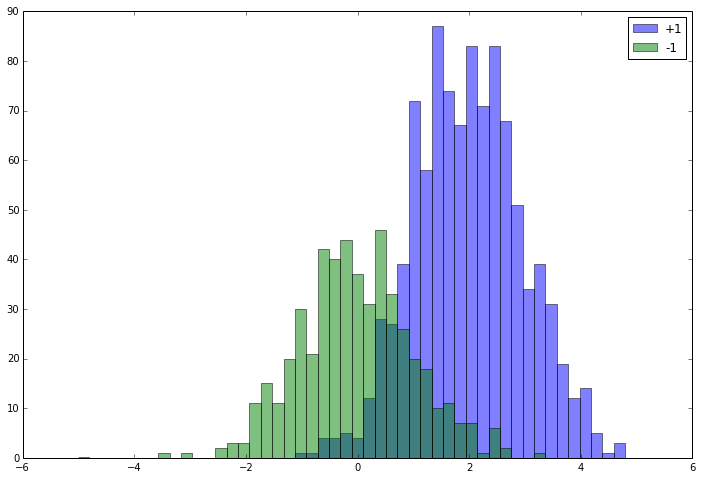

In [62]:
plt.figure(figsize=(12,8))
bins = np.linspace(-5,5,50)
hp, b1, p1 = plt.hist(xps, bins=bins, alpha=0.5, label='+1')
hm, b2, p2 = plt.hist(xms, bins=bins, alpha=0.5, label ='-1')
plt.legend()

1) First plot
$P(+1|x)$ vs $x$

`hp` and `hm` contains histogram value for class +1 and -1.

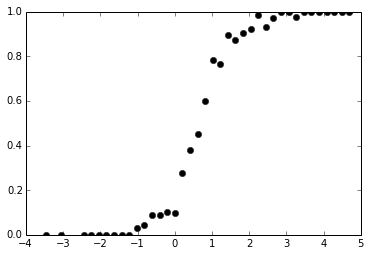

In [6]:
#some helper for you
midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm) if x1+x2>0 ]
xs = []
ys = []
for x, y in prob:
    xs += [x]
    ys += [y]
plt.plot(xs, ys, 'ok')

2) Should you use linear regression to predict the probability? Why? If you have time try and see what happens.

Could produce negative probability or 2.0

3) Plot with $s = -5 \ldots 5$

$$\theta(s) = \frac{1}{1+e^{-s}}$$

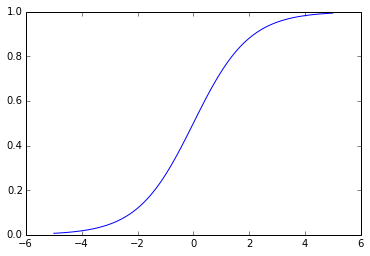

In [7]:
xs = np.linspace(-5, 5, 100)
ys = 1./(1 + np.exp(-xs))

plt.plot(xs, ys)

4) Find $\theta(\infty)$ and $\theta(-\infty)$

5) Show that

$$1-\theta(s) = \theta(-s)$$

6) How should we compte $s$ from the features ?

7) Given that you use hypothesis $$ P_\vec{w}(1 | \vec{x}) = \theta(\vec{w}\cdot\vec{x}) $$
and that you only 2 classes (+1 and -1) what is

$$ P_\vec{w}(-1 | \vec{x})$$

8) What parameter parametrize your hypothesis?

9) Use the fact from 5) write what you found in 7 in a simpler form

$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \ldots & y = 1 \\
    \ldots & y = -1
\end{cases}
$$

10) Use the fact that $y\in\{-1, 1\}$ and convince yourself that what you wrote above is just

$$ P_\vec{w}\left(y|\vec{x} \right) = \theta\left(y \times \left( \vec{w} \cdot \vec{x} \right) \right)$$

11) How do we distinguish a good hypothesis from bad hypothesis? (good $\vec{w}$ from bad $\vec{w}$)

12) What does likelihood represents?

13) Let us do one concrete example here.  Calculate the likelihood for $\vec{w}$ given these data point
$$\vec{w}_1 = (1,2,3)$$
- $y = 1$, $x=[1, -1]$
- $y = -1$, $x=[-2, 1]$ 

Don't forget to pad your feature.

$$ \theta{(1 \cdot ([1, 2, 3] \cdot [1, 1, -1])} $$

In [4]:
def theta(s):
    return 1.0/(1.0 + np.exp(-s))

def dotProduct(a, b):
    sum = 0
    for i in xrange(len(a)):
        sum += a[i] * b[i]
    return sum

print theta(1 * dotProduct([1, 1, -1], [1, 2, 3]))
print theta(-1 * dotProduct([1, -2, 1], [1, 2, 3]))

print "see both = " + str(0.5**2)

0.5
0.5
see both = 0.25


14) Is $\vec{w}_2 = (1,1,1)$ a better hypothesis?

In [9]:
print theta(1 * dotProduct([1, 1, -1], [1, 1, 1]))
print theta(-1 * dotProduct([1, -2, 1], [1, 1, 1]))

print "see both = " + str(theta(1 * dotProduct([1, 1, -1], [1, 1, 1])) * theta(-1 * dotProduct([1, -2, 1], [1, 1, 1])))

0.73105857863
0.5
see both = 0.365529289315


15) What happen when we take log of the likelihood? Write down log likehood in terms of feature, weight and classes.

16) Does greater log likelihood indicate a better hypothesis? Or is it the other way around.

    yes

17) Write down our cost function. Do we want to maximize or minimize the cost function?

$$ Cost(\hat{w}) = - lnL(\hat{w}) $$

18) Turn what you found in 17 to minization problem.

In [13]:
import math
def padAll(x):
#     tmp = np.zeros((len(ftr), 2))
#     tmp[:, 0] = 1.
#     tmp[:, 1] = ftr
    l = len(x)
    tmp = np.empty((l, 2))
    tmp[:, 0] = 1
    tmp[:, 1] = x
    return tmp



def cost(w):
    pxps = padAll(xps)
    pxms = padAll(xms)
    cost_p = np.sum(np.log1p(np.exp(-np.dot(pxps, w))))
    cost_m = np.sum(np.log1p(np.exp( np.dot(pxms,w))))
    return cost_p + cost_m

#     sum = 0
#     a = padAll(xps)
#     b = padAll(xms)
#     for i in xrange(len(xps)):
#         sum += math.log1p( math.exp(-1 * dotProduct(ws, a[i])) )
#     for i in xrange(len(xms)):
#         sum += math.log1p( math.exp( 1 * dotProduct(ws, b[i])) )
#     return sum

    
print cost([2.0, 3.0])
    
import scipy.optimize as opt
res = opt.fmin(cost, [1.,1.])  
print res






1282.54411388
Optimization terminated successfully.
         Current function value: 475.996047
         Iterations: 44
         Function evaluations: 84
[-1.39002017  2.11646711]


19) Minimize it and try to debug it. You will most likely run into a bunch of numerical problems.

Hint: computer doesn't like '$e^x$ when $x$ is large. You may find numpy.clip useful

Hint: `log` function is typically inaccurate when the argument is near 1. Use `log1p` when you want to calculate `log(1+x)` for greater accuracy.

20) Once you are done. Compare you hypothesis with the probability getting from data.

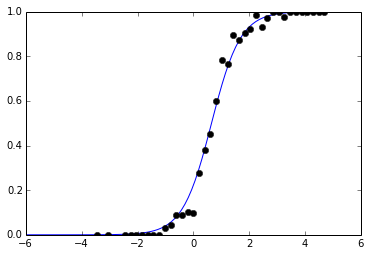

In [120]:
xs = []
ys = []
for x, y in prob:
    xs += [x]
    ys += [y]



xx = np.linspace(-6, 6, 100)


guesses = [theta(np.dot(res, [1,x])) for x in xx]
plt.plot(xx, guesses)
plt.plot(xs, ys, 'ok')

# ROC Curve (receiver operating characteristic)

Let us consider a fingerprint application to authenticate people through super secret stuff. So the class +1 means authenticate and -1 means denied entry.

1) What is True Positive?

2) What is False Positive?

3) What is False Positive?

4) What is False Negative?

5) Which of the above number you want to be high and which of the above number you want to be low?

6) Where would you place a cut on classifier output to make True Positive rate really high? What 's wrong with that?

7) Where would you place a cut on classifier output to make True Negative rate really high? What 's wrong with that?

8) If we place a cut at 0.3. What are the numbers for "True positive sample", "True negative sample", "False postive samples", "False negative samples"

Write a function to do that we need it later.

9) If we place a cut at 0.3. What is "True positive **rate**", "True negative **rate**", "False postive **rate**", "False negative **rate**" 

Write a function to do that. We will need it later.

10) If we place a cut at 0.7. Which of the rate would be higher and which of the rate would be lower? (Reason first, then run the code and see if it matches)

11) Vary the cut and plot True positive rate on y axis and false positive rate on x axis. This curve is called ROC curve.
if you classifier is good which corner it should go?

12) Consider these two fingerprint application and tell relatively where we should place a cut(which one with higher cut?)

A) FBI Door fingerprint.

B) Supermarket membership where use scan finger to verify the membership.